# Project: Wrangling and Analyze Data

In [12]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import os
import seaborn as sb

%matplotlib inline 

### Content

1. [Data Gathering](#Data-Gathering)

2. [Assessing Data](#Assessing-Data)

    2.1. [Quality Issues](#Quality-Issues)
    
    2.2. [Tidiness Issues](#Tidiness-Issues)
    
3. [Cleaning Data](#Cleaning-Data)

    3.1. [Quality Fixes](#Quality-Fixes)
    
    3.2. [Tidiness Fixes](#Tidiness-Fixes)
    
    3.3. [Issue 1](#Issue-1)
    
    3.4. [Issue 2](#Issue-2)
    
    3.5. [Issue 3](#Issue-3)
    
    3.6. [Issue 4](#Issue-4)
    
    3.7. [Issue 5](#Issue-5)
    
    3.8. [Issue 6](#Issue-6)
    
    3.9. [Issue 7](#Issue-7)
    
    3.10. [Issue 8](#Issue-8)
    
    3.11. [Issue 9](#Issue-9)
    
    3.12. [Issue 10](#Issue-10)
    
    3.13. [Issue 11](#Issue-11)
    
    3.14. [Issue 12](#Issue-12)

4. [Storing Data](#Storing-Data)

5. [Analyzing and Visualizing Data](#Analyzing-and-Visualizing-Data)

    5.1 [Question 1](#Question-1)
    
    5.2 [Question 2](#Question-2)
    
    5.3 [Question 3](#Question-3)

6. [Insights](#Insights)

7. [Visualization](#Visualization)
    

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [13]:
# Read on-hand data

twit_arc = pd.read_csv('twitter-archive-enhanced.csv')
twit_arc.head();

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [14]:
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [15]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [16]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [17]:
image_predictions = pd.read_csv('image-predictions/image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [18]:
#read json data to df

json_data = pd.read_json('tweet_json.txt', lines = True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [19]:
twit_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

See how many classifications there are

In [21]:
twit_arc.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
twit_arc.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
twit_arc.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [24]:
twit_arc.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
# Count tweets that mention 'puppo' as classification

twit_arc['text'].str.contains('puppo').sum()

37

In [26]:
# Checking errors in rating scores

(twit_arc.rating_numerator == twit_arc.rating_denominator).value_counts()

False    1893
True      463
dtype: int64

In [27]:
eql_rate = twit_arc[twit_arc['rating_numerator'] == twit_arc['rating_denominator']]

In [28]:
eql_rate.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1868,675166823650848770,NaN,NaN,2015-12-11 04:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnold. He broke his leg saving a hand...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675166823...,10,10,Arnold,None,None,None,None
386,826615380357632002,NaN,NaN,2017-02-01 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Please only send in dogs. We on...,8.099208e+17,4.196984e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None
2132,670079681849372674,NaN,NaN,2015-11-27 03:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fabio. He's a wonderful pup. Can't stay a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670079681...,10,10,Fabio,None,None,None,None
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None
1281,708810915978854401,NaN,NaN,2016-03-13 00:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He's a wonderful father to his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708810915...,10,10,Mister,None,None,None,None
2085,670804601705242624,NaN,NaN,2015-11-29 03:20:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Mason. He's a total frat boy. Pretends to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670804601...,10,10,Mason,None,None,None,None
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shakespeare. He appears to be maximum ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,None,None,None,None
2039,671547767500775424,NaN,NaN,2015-12-01 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She chews shoes then feels ext...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671547767...,10,10,Marley,None,None,None,None
2203,668641109086707712,NaN,NaN,2015-11-23 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hanz. He heard some thunder. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668641109...,10,10,Hanz,None,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None


In [29]:
# Checking how many retweets are in the tweets

json_data.full_text.str.contains('RT @').sum()

179

In [30]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [33]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [34]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [35]:
json_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [36]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [37]:
json_data.favorited.value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [38]:
json_data.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [39]:
json_data['extended_entities'].sample()

510    {'media': [{'id': 811985615826714624, 'id_str'...
Name: extended_entities, dtype: object

In [40]:
json_data['quoted_status_id'].unique()

array([             nan,   8.86053434e+17,   8.85517367e+17,
         8.83965651e+17,   8.78599869e+17,   8.76162994e+17,
         8.74413398e+17,   8.71075758e+17,   8.66458719e+17,
         8.55857318e+17,   8.55656431e+17,   8.46484799e+17,
         8.46088479e+17,   8.41311396e+17,   8.38948714e+17,
         8.34086677e+17,   8.32268303e+17,   8.23966201e+17,
         8.17902081e+17,   8.06570933e+17,   8.04417859e+17,
         7.96123680e+17,   7.88818329e+17,   7.71905569e+17,
         7.59167559e+17,   6.72108316e+17,   7.25136065e+17,
         7.16637124e+17,   7.09919141e+17,   7.06165921e+17])

### Quality Issues
1. Image prediction data has only 2075 entries, whereas the archive has 2356

2. Archive data only has 384 total dog classifications (doggo, pupper, etc) out of 2356 total entries

3. Timestamp in the Archive data should be a datetime object

4. 543 of the P1, and 522 of P2 predictions in Image Prediction data aren't even dogs

5. The json_data favorited column has only 8 True entries, whereas the favorite_count column has 179    '0' entries

6. json_data is missing 2 tweet texts, as compared to the Archive df

7. 179 entries in json_data['full_text'] contain the string "RT @", which indicates a retweet. We want only original tweets

8. The extended_entities column in json_data seems to show tweets/ratings that have a picture attached. These are the only tweets we want, but they're only 2073 of them

### Tidiness Issues
1. quoted_status_id and quoted_status_id_str, and in_reply_to_status_id and in_reply_to_status_id_str in jason_data contain the exact same values

2. twit_arc.text == json_data.full_text

3. Dog classifications in archive are in 4 columns

4. Information about one type of observational unit (tweets) is spread across three different files/dataframes.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [41]:
# Make copies of original pieces of data

twit_arc_new = twit_arc.copy()
image_pred_new = image_predictions.copy()
json_data_new = json_data.copy()

### Quality Fixes
1. Since we don't have access to prediction AI, remove the entries without image predictions from the archive

2. Search for more classifications from the tweet texts, and determine if you then have enough to use them at all

3. Change timestamp in the archive to datetime object

4. Remove predictions that aren't dogs, and combine the highest prediction for each tweet into a single column

5. Remove data that doesn't have favorite counts, and remove the favorited column entirely

6. Remove the rows from archive that don't have matching data in json_data 

7. Remove retweets from archive data

8. Remove tweets that don't have a picture

### Tidiness Fixes

1. Remove duplicate columns from json_data

2. Remove text column from archive data

3. Combine classification columns into 1

4. Remove unwanted columns and merge all dataframes into 1 master dataframe using tweet id

### Issue 1

#### Define:

Since we don't have access to prediction AI, remove the entries without image predictions from the archive

#### Code

In [42]:
twit_arc_new = twit_arc_new[twit_arc_new.tweet_id.isin(image_pred_new.tweet_id)]

#### Test

In [43]:
twit_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: float64(4), int64(3), objec

### Issue 2



#### Define

Search for more classifications from the tweet texts, and determine if you then have enough to use them at all

#### Code

In [44]:
#checking puppo count

twit_arc_new['puppo'].value_counts()

None     2051
puppo      24
Name: puppo, dtype: int64

In [45]:
#checking puppo tweets

twit_arc_new['text'].str.contains('puppo').sum()

29

In [46]:
# updating puppo column

twit_arc_new.loc[twit_arc_new['text'].str.contains('puppo'), 'puppo'] = 'puppo'

In [47]:
# Test puppo

twit_arc_new['puppo'].value_counts()

None     2045
puppo      30
Name: puppo, dtype: int64

In [48]:
# checking pupper count

twit_arc_new['pupper'].value_counts()

None      1853
pupper     222
Name: pupper, dtype: int64

In [49]:
# checking pupper tweets

twit_arc_new['text'].str.contains('pupper').sum()

238

In [50]:
# updating pupper column

twit_arc_new.loc[twit_arc_new['text'].str.contains('pupper'), 'pupper'] = 'pupper'

In [51]:
# Test pupper

twit_arc_new['pupper'].value_counts()

None      1830
pupper     245
Name: pupper, dtype: int64

In [52]:
# checking floofer count

twit_arc_new['floofer'].value_counts()

None       2067
floofer       8
Name: floofer, dtype: int64

In [53]:
# checking floofer tweets

twit_arc_new['text'].str.contains('floofer').sum()

3

In [54]:
# updating floofer column

twit_arc_new.loc[twit_arc_new['text'].str.contains('floofer'), 'floofer'] = 'floofer'

In [55]:
# Test floofer

twit_arc_new['floofer'].value_counts()

None       2067
floofer       8
Name: floofer, dtype: int64

In [56]:
# Checking doggo count

twit_arc_new['doggo'].value_counts()

None     1995
doggo      80
Name: doggo, dtype: int64

In [57]:
# checking floofer tweets

twit_arc_new['text'].str.contains('doggo').sum()

80

#### Test

In [58]:
twit_arc_new['puppo'].value_counts()

None     2045
puppo      30
Name: puppo, dtype: int64

In [59]:
twit_arc_new['pupper'].value_counts()

None      1830
pupper     245
Name: pupper, dtype: int64

In [60]:
twit_arc_new['floofer'].value_counts()

None       2067
floofer       8
Name: floofer, dtype: int64

In [61]:
twit_arc_new['doggo'].value_counts()

None     1995
doggo      80
Name: doggo, dtype: int64

### Conclusion

In total, we only have 363 dogs classified. This is too small a subset of the data to be sampled, so we'll leave out classification from our analysis

### Issue 3

Timestamp in the Archive data should be a datetime object

In [62]:
twit_arc_new['timestamp'] = pd.to_datetime(twit_arc_new['timestamp'])

### Test

In [63]:
twit_arc_new['timestamp'].dtypes

dtype('<M8[ns]')

### Issue 4

Combine the highest prediction for each tweet image into a single column, and remove redundant columns

In [64]:
image_pred_new['pred'] = np.where(image_pred_new['p1_dog'] == True, image_pred_new['p1'],
                                 np.where(image_pred_new['p2_dog']== True, image_pred_new['p2'],
                                          np.where(image_pred_new['p3_dog'] == True, image_pred_new['p3'], 'Not a Dog')))

In [65]:
image_pred_new['pred'].describe()

count          2075
unique          114
top       Not a Dog
freq            324
Name: pred, dtype: object

In [66]:
image_pred_new.drop(image_pred_new.columns[[2,3,4,5,6,7,8,9,10,11]], axis =1, inplace = True)

In [67]:
image_pred_new.drop(image_pred_new[image_pred_new.pred == 'Not a Dog'].index, inplace= True)

Rerun code in Fix 1, since some of the data has changed

In [68]:
twit_arc_new = twit_arc_new[twit_arc_new.tweet_id.isin(image_pred_new.tweet_id)]

### Test

In [69]:
image_pred_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
pred        1751 non-null object
dtypes: int64(1), object(2)
memory usage: 54.7+ KB


In [70]:
twit_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id                      1751 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1751 non-null datetime64[ns]
source                        1751 non-null object
text                          1751 non-null object
retweeted_status_id           65 non-null float64
retweeted_status_user_id      65 non-null float64
retweeted_status_timestamp    65 non-null object
expanded_urls                 1751 non-null object
rating_numerator              1751 non-null int64
rating_denominator            1751 non-null int64
name                          1751 non-null object
doggo                         1751 non-null object
floofer                       1751 non-null object
pupper                        1751 non-null object
puppo                         1751 non-null object
dtypes: datetime64[ns](1), 

### Issue 5

Remove json_data rows that don't have favorite counts, and remove the favorited column entirely

In [71]:
json_data_new.drop(json_data_new[json_data_new.favorite_count == 0].index, inplace = True)

### Test

In [72]:
json_data_new.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [73]:
json_data_new = json_data_new.drop(['favorited'], axis = 1)

### Test

In [74]:
json_data_new.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,full_text,geo,id,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Issue 6

Remove retweets from json_data_new

In [75]:
json_data_new.full_text.str.contains('RT @').sum()

0

### Test

This issue seems to have been resolved already

### Issue 7

Remove the rows from archive that don't have matching data in json_data_new

In [76]:
twit_arc_new = twit_arc_new[twit_arc_new.text.isin(json_data_new.full_text)]

### Test

In [77]:
twit_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id                      1686 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1686 non-null datetime64[ns]
source                        1686 non-null object
text                          1686 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1686 non-null object
rating_numerator              1686 non-null int64
rating_denominator            1686 non-null int64
name                          1686 non-null object
doggo                         1686 non-null object
floofer                       1686 non-null object
pupper                        1686 non-null object
puppo                         1686 non-null object
dtypes: datetime64[ns](1), flo

### Issue 8

Remove tweets without images from json_data_new

In [78]:
json_data_new = json_data_new[json_data_new['extended_entities'].notna()]

### Test

In [79]:
json_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2353
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1994 non-null datetime64[ns]
display_text_range               1994 non-null object
entities                         1994 non-null object
extended_entities                1994 non-null object
favorite_count                   1994 non-null int64
full_text                        1994 non-null object
geo                              0 non-null float64
id                               1994 non-null int64
id_str                           1994 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 non-null float64
is_quote_status                  199

### Issue 9

Remove duplicate columns from json_data

In [80]:
json_data_new = json_data_new.drop(['quoted_status_id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str'], axis = 1)

### Test

In [81]:
json_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2353
Data columns (total 26 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1994 non-null datetime64[ns]
display_text_range               1994 non-null object
entities                         1994 non-null object
extended_entities                1994 non-null object
favorite_count                   1994 non-null int64
full_text                        1994 non-null object
geo                              0 non-null float64
id                               1994 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
is_quote_status                  1994 non-null bool
lang                             1994 non-null object
place                            1 non-null object
possibly_sensitive               1994 

### Issue 10

Remove text column from twit_arc_new

In [82]:
twit_arc_new = twit_arc_new.drop(['text'], axis = 1)

### Test

In [83]:
twit_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 16 columns):
tweet_id                      1686 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1686 non-null datetime64[ns]
source                        1686 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1686 non-null object
rating_numerator              1686 non-null int64
rating_denominator            1686 non-null int64
name                          1686 non-null object
doggo                         1686 non-null object
floofer                       1686 non-null object
pupper                        1686 non-null object
puppo                         1686 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(8)
memory usage: 223.9+ K

### Issue 11

Combine classifications in twit_arc_new into 1 column. We know that we may not use this column, but this is just for the exercise.

In [84]:
def dog_class (row):
    if row['doggo'] == 'doggo' :
        return 'doggo'
    if row['floofer'] == 'floofer' :
        return 'floofer'
    if row['pupper'] == 'pupper' :
        return 'pupper'
    if row['puppo'] == 'puppo' :
        return 'puppo'

In [85]:
twit_arc_new['dog_class'] = twit_arc_new.apply(dog_class, axis =1)

### Test

In [86]:
twit_arc_new.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_class
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,None


### Issue 12

Merge datasets into one master dataset

In [87]:
twit_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id                      1686 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1686 non-null datetime64[ns]
source                        1686 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1686 non-null object
rating_numerator              1686 non-null int64
rating_denominator            1686 non-null int64
name                          1686 non-null object
doggo                         1686 non-null object
floofer                       1686 non-null object
pupper                        1686 non-null object
puppo                         1686 non-null object
dog_class                     282 non-null object
dtypes: datetime64[ns](1), floa

In [88]:
json_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2353
Data columns (total 26 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1994 non-null datetime64[ns]
display_text_range               1994 non-null object
entities                         1994 non-null object
extended_entities                1994 non-null object
favorite_count                   1994 non-null int64
full_text                        1994 non-null object
geo                              0 non-null float64
id                               1994 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
is_quote_status                  1994 non-null bool
lang                             1994 non-null object
place                            1 non-null object
possibly_sensitive               1994 

In [89]:
image_pred_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
pred        1751 non-null object
dtypes: int64(1), object(2)
memory usage: 54.7+ KB


In [90]:
json_data_new = json_data_new[json_data_new.id.isin(twit_arc_new.tweet_id)]

In [91]:
image_pred_new = image_pred_new[image_pred_new.tweet_id.isin(twit_arc_new.tweet_id)]

In [92]:
json_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2353
Data columns (total 26 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1686 non-null datetime64[ns]
display_text_range               1686 non-null object
entities                         1686 non-null object
extended_entities                1686 non-null object
favorite_count                   1686 non-null int64
full_text                        1686 non-null object
geo                              0 non-null float64
id                               1686 non-null int64
in_reply_to_screen_name          20 non-null object
in_reply_to_status_id            20 non-null float64
in_reply_to_user_id              20 non-null float64
is_quote_status                  1686 non-null bool
lang                             1686 non-null object
place                            1 non-null object
possibly_sensitive               1686 

In [93]:
json_data_new.drop(json_data_new.columns[[0,1,2,3,4,5,8,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25]], axis = 1, inplace = True)

In [94]:
json_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2353
Data columns (total 4 columns):
favorite_count    1686 non-null int64
full_text         1686 non-null object
id                1686 non-null int64
retweet_count     1686 non-null int64
dtypes: int64(3), object(1)
memory usage: 65.9+ KB


In [95]:
twit_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id                      1686 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1686 non-null datetime64[ns]
source                        1686 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1686 non-null object
rating_numerator              1686 non-null int64
rating_denominator            1686 non-null int64
name                          1686 non-null object
doggo                         1686 non-null object
floofer                       1686 non-null object
pupper                        1686 non-null object
puppo                         1686 non-null object
dog_class                     282 non-null object
dtypes: datetime64[ns](1), floa

In [96]:
twit_arc_new.drop(twit_arc_new.columns[[1,2,4,5,6,7,8,12,13,14,15,16]], axis = 1, inplace = True)

In [97]:
twit_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 5 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null datetime64[ns]
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 79.0+ KB


In [98]:
json_data_new.rename(columns = {'id' :'tweet_id' }, inplace = True)

In [99]:
twit_merged = pd.merge(twit_arc_new, json_data_new, on=['tweet_id'])

In [100]:
twit_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 8 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null datetime64[ns]
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
favorite_count        1686 non-null int64
full_text             1686 non-null object
retweet_count         1686 non-null int64
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 118.5+ KB


In [101]:
twit_master = pd.merge(twit_merged, image_pred_new, on = ['tweet_id'])
twit_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 10 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null datetime64[ns]
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
favorite_count        1686 non-null int64
full_text             1686 non-null object
retweet_count         1686 non-null int64
jpg_url               1686 non-null object
pred                  1686 non-null object
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 144.9+ KB


In [102]:
twit_master.rename(columns ={'pred':'breed'}, inplace = True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [103]:
twit_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

For our analysis, we'll try to answer 3 questions:

1. Which dog breeds have the highest ratings?
2. What are the 3 most popular dog names?
3. Which dog breeds did Twitter users love the most?

In [104]:
# First create a copy of the dataset

master = twit_master.copy()

### Question 1

Which dog breeds have the highest ratings?

In [105]:
#To answer the first question, we need to get the rating score of each dog in a new column

master['rating'] = master['rating_numerator']/master['rating_denominator']
master.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,favorite_count,full_text,retweet_count,jpg_url,breed,rating
0,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,33819,This is Tilly. She's just checking pup on you....,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,1.3
1,891815181378084864,2017-07-31 00:18:03,12,10,Archie,25461,This is Archie. He is a rare Norwegian Pouncin...,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,1.2
2,891689557279858688,2017-07-30 15:58:51,13,10,Darla,42908,This is Darla. She commenced a snooze mid meal...,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,1.3
3,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,41048,This is Franklin. He would like you to stop ca...,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,1.2
4,891087950875897856,2017-07-29 00:08:17,13,10,None,20562,Here we have a majestic great white breaching ...,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,1.3


In [106]:
ratings = pd.DataFrame(master.groupby('breed')['rating'].mean()).sort_values(by='rating', ascending = False).reset_index()
ratings.head()

,breed,rating
0,clumber,2.700000
1,Bouvier_des_Flandres,1.300000
2,Saluki,1.250000
3,Pomeranian,1.247619
4,briard,1.233333


It appears the clumber breed has the highest rating, but this could be because there are so few of them. We can investigate this

In [107]:
ratings.breed.str.contains('clumber').sum()

1

To tackle this potential issue, we'll only take breeds with 20 or more ratings

In [108]:
ratings_n = master[master['breed'].map(master['breed'].value_counts()) >= 10]

In [109]:
ratings_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 1683
Data columns (total 11 columns):
tweet_id              1426 non-null int64
timestamp             1426 non-null datetime64[ns]
rating_numerator      1426 non-null int64
rating_denominator    1426 non-null int64
name                  1426 non-null object
favorite_count        1426 non-null int64
full_text             1426 non-null object
retweet_count         1426 non-null int64
jpg_url               1426 non-null object
breed                 1426 non-null object
rating                1426 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 133.7+ KB


This still gives us a healthy population to work with. We'll try the same code again

In [110]:
ratings = pd.DataFrame(ratings_n.groupby('breed')['rating'].mean()).sort_values(by='rating', ascending = False).reset_index()
ratings.head()

,breed,rating
0,Pomeranian,1.247619
1,Samoyed,1.169048
2,golden_retriever,1.166752
3,kuvasz,1.161111
4,Great_Pyrenees,1.146667


Just for surety, I want to get a higher number of rates and see if that changes our results

In [111]:
ratings_c = master[master['breed'].map(master['breed'].value_counts()) >= 20]

In [112]:
ratings_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 1683
Data columns (total 11 columns):
tweet_id              992 non-null int64
timestamp             992 non-null datetime64[ns]
rating_numerator      992 non-null int64
rating_denominator    992 non-null int64
name                  992 non-null object
favorite_count        992 non-null int64
full_text             992 non-null object
retweet_count         992 non-null int64
jpg_url               992 non-null object
breed                 992 non-null object
rating                992 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 93.0+ KB


In [113]:
ratings_try = pd.DataFrame(ratings_c.groupby('breed')['rating'].mean()).sort_values(by='rating', ascending = False).reset_index()
ratings_try.head()

,breed,rating
0,Pomeranian,1.247619
1,Samoyed,1.169048
2,golden_retriever,1.166752
3,chow,1.141667
4,Pembroke,1.141053


Even with tighter competition, we still seem to have the same winners

### Question 2

What are the 3 most popular dog names?

In [114]:
master.name.value_counts()

None         419
a             46
Lucy          10
Cooper        10
Charlie       10
Tucker         9
Oliver         9
Penny          8
Daisy          7
Sadie          7
Winston        7
the            7
Lola           6
Jax            6
Toby           6
Koda           6
Rusty          5
Bo             5
Leo            5
Stanley        5
Bella          5
Oscar          5
Duke           4
Maggie         4
Jack           4
Louis          4
Bailey         4
Alfie          4
Larry          4
Cassie         4
            ... 
Tycho          1
Donny          1
Clybe          1
Dale           1
Blanket        1
Angel          1
Jonah          1
Jebberson      1
Taz            1
Kaiya          1
Lorelei        1
Ollie          1
Nida           1
Finnegus       1
Brad           1
Einstein       1
Furzey         1
Darla          1
Bobbay         1
Pubert         1
Striker        1
Terrenth       1
Dallas         1
Rodney         1
Noah           1
Rontu          1
Roscoe         1
Fwed          

The name "a" seems like it might be an error that we didn't spot in our assessment. We'll need further investigation from the data source to verify this.

In the meantime, however, we can take the next most popular names.

### Question 3

Which dog breeds did Twitter users love the most?
To answer this, we'll use data from both the `retweet_count` and `favorite_count` columns

In [115]:
loved = pd.DataFrame(master.groupby('breed')['retweet_count','favorite_count'].mean()).sort_values(by=['retweet_count','favorite_count'], ascending = False).reset_index()

In [116]:
loved.head(10)

,breed,retweet_count,favorite_count
0,Bedlington_terrier,7510.166667,21153.166667
1,Afghan_hound,5976.000000,17326.666667
2,standard_poodle,5508.909091,13912.818182
3,English_springer,5401.600000,14138.300000
4,Saluki,5133.750000,24060.000000
5,French_bulldog,5039.677419,18416.806452
6,cocker_spaniel,4858.100000,13580.400000
7,Samoyed,4843.952381,13902.523810
8,whippet,4840.272727,12911.454545
9,Great_Pyrenees,4533.866667,12456.466667


In [117]:
loved_n = pd.DataFrame(master.groupby('breed')['favorite_count','retweet_count'].mean()).sort_values(by=['favorite_count','retweet_count'], ascending = False).reset_index()


In [118]:
loved_n.head(10)

,breed,favorite_count,retweet_count
0,Saluki,24060.000000,5133.750000
1,Bedlington_terrier,21153.166667,7510.166667
2,French_bulldog,18416.806452,5039.677419
3,Bouvier_des_Flandres,18032.000000,4479.000000
4,Afghan_hound,17326.666667,5976.000000
5,black-and-tan_coonhound,17012.000000,4164.500000
6,flat-coated_retriever,16791.625000,4520.250000
7,Irish_water_spaniel,16400.000000,4500.666667
8,Leonberg,14934.333333,3863.666667
9,English_springer,14138.300000,5401.600000


It appears there's no clear winner in this case. 
When we use favorites as our main ranking, we see what followers of WeRateDogs' page love, and
when we use retweets, we see what the broader Twitter population prefers.
However, we can make a few inferences based on the mean of the indexes of the breeds that show up in the top 10 on both lists:
1. Bedlington Terriers seem to be the most loved overall with a mean index of S/No. 0.5 (pretty high!)
2. Next comes the Saluki, with index 2, and Afghan Hound with 2.5
3. French Bulldog has 3.5 and English Spaniel has 6

### Insights
1. Pomenarians are the highest rated dogs, followed by Samoyeds and Golden Retrievers

2. Cooper, Lucy and Charlie are the most popular dog names

3. Bedlington Terriers, Saluki, Afghan Hound, French Bulldog and English Spaniel, in that order, are the most loved dog breeds

### Visualization

In [119]:
viz = master[master['breed'].map(master['breed'].value_counts()) >= 33]
viz.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,favorite_count,full_text,retweet_count,jpg_url,breed,rating
0,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,33819,This is Tilly. She's just checking pup on you....,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,1.3
1,891815181378084864,2017-07-31 00:18:03,12,10,Archie,25461,This is Archie. He is a rare Norwegian Pouncin...,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,1.2
2,891689557279858688,2017-07-30 15:58:51,13,10,Darla,42908,This is Darla. She commenced a snooze mid meal...,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,1.3
6,890729181411237888,2017-07-28 00:22:40,13,10,None,56848,When you watch your owner call another dog a g...,16716,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,1.3
8,890240255349198849,2017-07-26 15:59:51,14,10,Cassie,32467,This is Cassie. She is a college pup. Studying...,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,1.4


In [120]:
viz_n = viz.breed.value_counts()

In [121]:
viz_order = viz_n.index

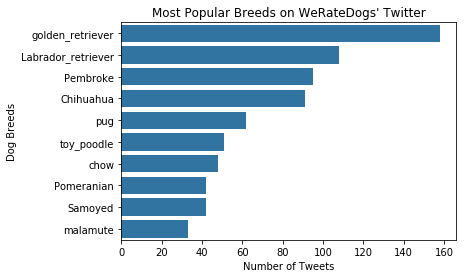

In [122]:
base_color = sb.color_palette()[0]
sb.countplot(data = viz, y='breed', color=base_color, order=viz_order)

plt.xlabel('Number of Tweets')
plt.ylabel('Dog Breeds')
plt.title("Most Popular Breeds on WeRateDogs' Twitter");